# Homework 12

- Implement a Perceptron. 
- Train and test it for the Iris data set below 
- visualise the data points and the decission boundry of your trained Perceptron on a 2D plot (petal length vs petal width)
- compare to sklearn implementation

### Load Data

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data[:, (2, 3)]  # use only petal length and petal width
y = (iris.target == 0).astype(np.int) # check only if it's an Iris-Setosa (1), or no (0)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Perceptron 

In [2]:
import random


def sigmoid(z):
    """The sigmoid function."""
    return 1.0 / (1.0 + np.exp(-z))


def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z) * (1 - sigmoid(z))


class Perceptron:
    def __init__(self, alpha=0.01, max_iter=1000):
        self.alpha = alpha
        self.max_iter = max_iter
        self.weights = []
        self.X = None
        self.y = None
        self.n_samples = 0
        self.n_features = 0
        self.bias = random.random()

    def fit(self, X, y):
        self.X, self.y, self.n_features, self.n_samples = X, y, len(X[0]), len(y)
        self.weights = [random.random() for _ in range(self.n_features)]
        self.bias = random.random()
        self._calculate_weights_and_bias()

    def _calculate_weights_and_bias(self):
        weights_parts = []
        for iteration in range(self.max_iter):
            prediction, sum_diff = None, 0
            for sample in range(self.n_samples):
                weights_parts = [0 for _ in range(self.n_features)]
                for feature in range(self.n_features):
                    weights_parts[feature] = self.weights[feature] * self.X[sample, feature]
                for feature in range(self.n_features):
                    prediction = sigmoid(
                        self._polynomial(self.X[sample], weights_parts) * self.X[sample, feature])
                    sum_diff += abs(self.y[sample] - prediction)
            for sample in range(self.n_features):
                self.weights[sample] -= (self.alpha / self.n_samples) * sum_diff
            self.bias -= (self.alpha / self.n_samples) * sum_diff

    def _polynomial(self, x, weights=None):
        if weights is None:
            weights = self.weights
        polynomial = 0
        for feature in range(self.n_features):
            polynomial += x[feature] * weights[feature]
        return polynomial + self.bias

    def predict(self, X):
        return [sigmoid(self._polynomial(X[i])) for i in range(len(X))]

    def score(self, predictions, labels):
        correct_predictions = 0
        for prediction, label in zip(predictions, labels):
            correct_predictions += 1 if (label == 0 and prediction < 0.5) or (label == 1 and prediction >= 0.5) else 0
        return correct_predictions / len(predictions)



### Test Perceptron class

In [3]:
import matplotlib.pyplot as plt

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
predicted = perceptron.predict(X_test)
score = perceptron.score(predicted, y_test)
print("My perceptron score : {}".format(score))



My perceptron score : 0.7105263157894737


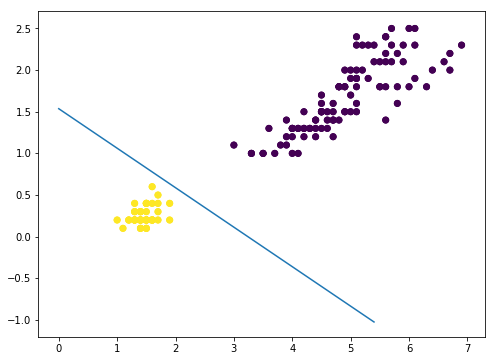

In [4]:
# visualise
plt.rcParams['axes.labelsize'] = 14
plt.figure(2, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y )

[weight0, weight1], bias = perceptron.weights, perceptron.bias
_x = -bias/weight0
_y = -bias/weight1
b = _y
a = -_y/_x
_x *= max(X[:,1])
_y *= max(X[:,0])
coordinate_x = np.array([- 2*_x, 0])
coordinate_y = a* -coordinate_x[::-1]/2 + b

plt.plot(coordinate_x, coordinate_y)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### Compere with Sklearn perceptron

In [5]:
from sklearn.linear_model import Perceptron as SP

sp = SP()
sp.fit(X_train, y_train)
sp_score = sp.score(X_test, y_test)
print("Skearn perceptron score : {}".format(sp_score))


Skearn perceptron score : 1.0


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


### Conclusion

My perceptron implementation is quite good, though the perceptron class from sklearn has better accuracy score for given data set.
